# Challenge: OpenQAOA

Quantum computing is used extensively for modelling and solving combinatorial optimisation problems. The purpose of this is to find a problem with binary clauses where the amount of states is immense and difficult to solve with classical resources. This type of problem is known as NP-hard. in order to uncover the correct answers, quantum computing produces algorithms of NP-complexity. On the other hand, in quantum computing, we are interested in representing such a model in a quantum circuit and being able to find the optimal states that satisfy the cost function using a classical optimizer.

Multiple companies work around computers and generate an SDK that can generate quantum circuits, in this challenge, we focus on a fundamental step of the Quantum Approximate Optimization Algorithm (QAOA) algorithm. Before starting the quantum part, one must model a problem in terms of 0 and 1 and convert it into a Quadratic unconstrained binary optimization (QUBO) form that can then be converted into an Ising model to find the optimal states. To validate the model one makes use of OpenQAOA, an SDK focused on circuitry of the QAOA algorithm. 

If you want to know more about this SDK you can check the following link https://openqaoa.entropicalabs.com/ 

**NOTES**: 
>
>   * To run on real QPU or  simulators you can use  [qbraid](https://account.qbraid.com/) 
>
>   * The [OpenQAOA workflow](https://openqaoa.entropicalabs.com/workflows/customise-the-QAOA-workflow/#the-circuit-properties)
>
>   * To guide you, you can check out [examples of problems in OpenQAOA](https://github.com/entropicalabs/openqaoa/tree/main/examples/community_tutorials)

# Problem to solve

Find a real-world problem that can benefit from the application of combinatorial optimization. Consult the list of [OpenQAOA](https://openqaoa.entropicalabs.com/) problem classes to find references. 

Your solution's innovativeness will be rewarded with extra points.

The process is the following

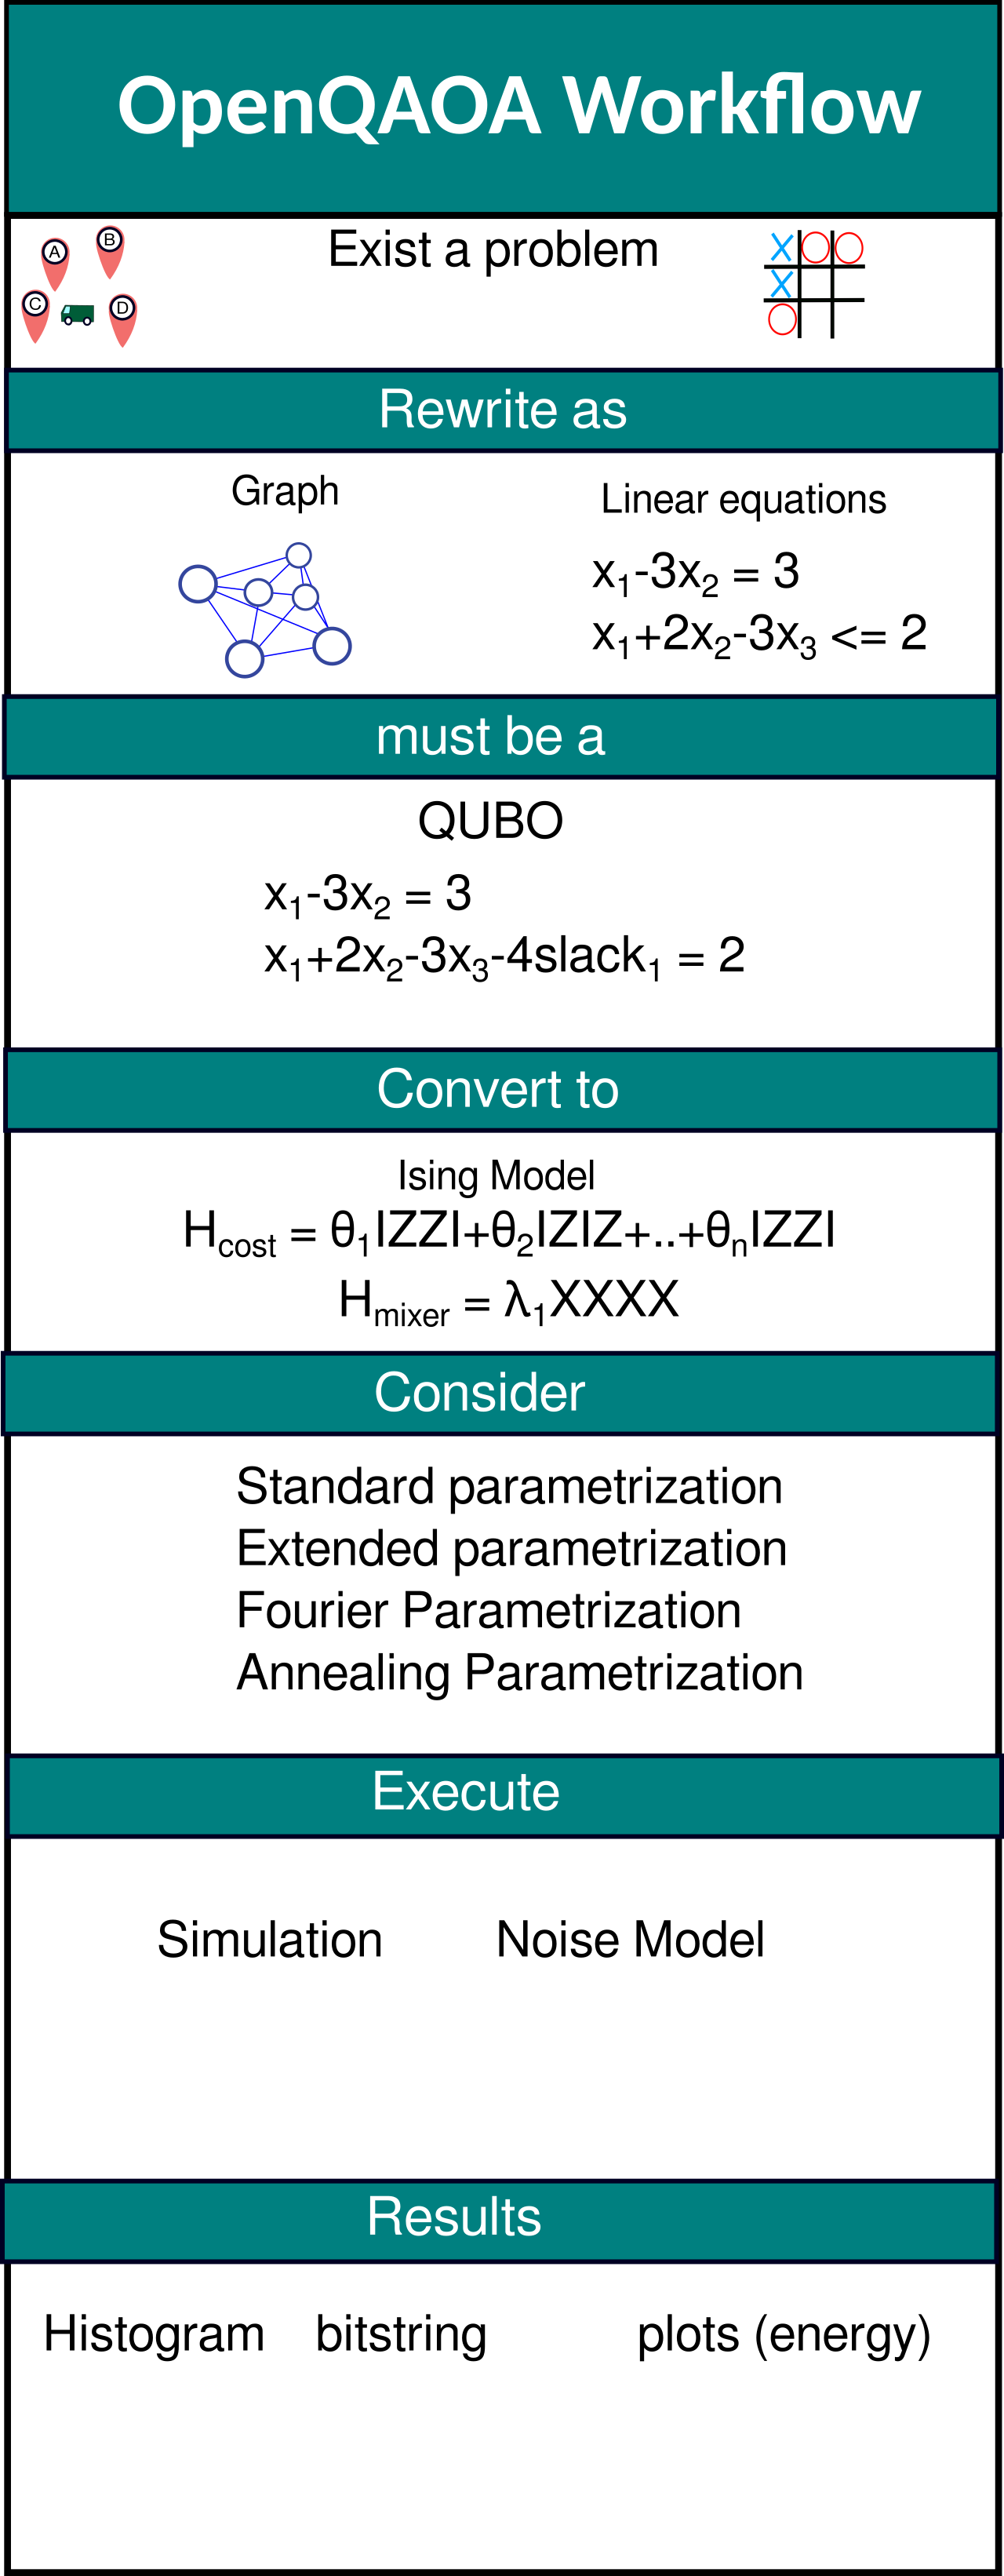

## Part 1: Define your problem and solve it using QAOA
Considering the examples based on OpenQAOA, we already have different classes and methods that facilitate the construction of quantum circuits, but to generate a QUBO we will rely on docplex.

You can find more information on QAOA [examples](https://github.com/entropicalabs/openqaoa/tree/main/examples) and how to generate [QUBOs](https://openqaoa.entropicalabs.com/problems/what-is-a-qubo/) in the [OpenQAOA documentation](https://openqaoa.entropicalabs.com/). The code is available on [GitHub](https://github.com/entropicalabs/openqaoa/tree/main) and you can find more details of implementation in the [API reference](https://el-openqaoa.readthedocs.io/en/main/index.html).

In [1]:
%matplotlib notebook

# Import external libraries to present an manipulate the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import docplex model to generate the problem to optimize
from docplex.mp.model import Model

# Import the libraries needed to employ the QAOA quantum algorithm using OpenQAOA
from openqaoa import QAOA

# method to covnert a docplex model to a qubo problem
from openqaoa.problems.converters import FromDocplex2IsingModel #check this method and properties
from openqaoa.backends import create_device

# method to find the correct states for the QAOA object 
from openqaoa.utilities import ground_state_hamiltonian

Code your problem

In [30]:
# inputs
values = [2,6,8,7,3,4,6]
weights = [7,3,3,5,4,7,5]
max_weight = 25


def Problem(values, weights, max_weight):
    
    # initialize a model
    mdl = Model(name="Binpacking")
    # indicate the binary variables 
    x = {i: mdl.binary_var(name=f"x_{i}") for i in range(len(values))}  
    # define the objective function
    mdl.minimize(mdl.sum(values[i] * x[i] for i in x))    
    # add the constraints
    mdl.add_constraint(mdl.sum(weights[i] * x[i] for i in x) <= max_weight)
    return  FromDocplex2IsingModel(mdl) #return model, check FromDocplex2IsingModel

In [31]:
problem =  Problem(values, weights, max_weight)

# Ising encoding of the QUBO problem for binpacking problem
qubo = problem.ising_model

# Docplex encoding of the QUBO problem for binpacking problem
mdl_qubo_docplex = problem.qubo_docplex

mdl_qubo_docplex.prettyprint()


// This file has been generated by DOcplex
// model name is: Binpacking
// var contrainer section
dvar bool slack_C0[5];

// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;
dvar bool x_5;
dvar bool x_6;
dvar bool slack_C0_0;
dvar bool slack_C0_1;
dvar bool slack_C0_2;
dvar bool slack_C0_3;
dvar bool slack_C0_4;

minimize
 - 12948 x_0 - 5544 x_1 - 5542 x_2 - 9243 x_3 - 7397 x_4 - 12946 x_5
 - 9244 x_6 - 1850 slack_C0_0 - 3700 slack_C0_1 - 7400 slack_C0_2
 - 14800 slack_C0_3 - 18500 slack_C0_4 [ 1813 x_0^2 + 1554 x_0*x_1
 + 1554 x_0*x_2 + 2590 x_0*x_3 + 2072 x_0*x_4 + 3626 x_0*x_5 + 2590 x_0*x_6
 + 518 x_0*slack_C0_0 + 1036 x_0*slack_C0_1 + 2072 x_0*slack_C0_2
 + 4144 x_0*slack_C0_3 + 5180 x_0*slack_C0_4 + 333 x_1^2 + 666 x_1*x_2
 + 1110 x_1*x_3 + 888 x_1*x_4 + 1554 x_1*x_5 + 1110 x_1*x_6
 + 222 x_1*slack_C0_0 + 444 x_1*slack_C0_1 + 888 x_1*slack_C0_2
 + 1776 x_1*slack_C0_3 + 2220 x_1*slack_C0_4 + 333 x_2^2 + 1110 x_2*x_3
 + 888 x_2*x_4 + 15

In [4]:
# Initialize the QAOA object
qaoa = QAOA()

qiskit_device = create_device(location='local', name='qiskit.qasm_simulator')
qaoa.set_device(qiskit_device)

# Set the parameters to use the QAOA algorithm
# where n_shots=1024 and  seed_simulator=1
qaoa.set_backend_properties(n_shots=1024, seed_simulator=1)
# p=1, a custom type and range from 0 to pi
qaoa.set_circuit_properties(p=1, param_type='standard', init_type='ramp', mixer_hamiltonian='xy')

qaoa.compile(qubo)

# Run the QAOA algorithm
qaoa.optimize()

pd.DataFrame(qaoa.result.lowest_cost_bitstrings(5))

,solutions_bitstrings,bitstrings_energies,probabilities
0,0001111,0.0,0.012695
1,0100111,4.0,0.005859
2,0010111,7.0,0.007812
3,1000111,7.0,0.000977
4,1101011,11.0,0.004883


In [5]:
# To find the correct answer using ground_state_hamiltonian
# and the parameter is a cost_hamiltonian
correct_solution = ground_state_hamiltonian(qaoa.cost_hamil)
print(correct_solution)

(0.0, ['0001111'])


Validate your answer using docplex, you can see how to check the classical solution using the following tutorial [here](https://github.com/entropicalabs/openqaoa/blob/main/examples/community_tutorials/02_docplex_example.ipynb) 

In [6]:
## docplex solution
sol = mdl_qubo_docplex.solve()
mdl_qubo_docplex.print_solution(print_zeros=True)

objective: 0.000
status: OPTIMAL_SOLUTION(2)
  x_0=0
  x_1=0
  x_2=0
  slack_C0_0=1
  slack_C0_1=1
  slack_C0_2=1
  slack_C0_3=1


## Part 2: Improve the QAOA circuit

Perform the same process as above now with the variant of using different backends, p values, and different optimizers until you find the one that can provide the correct answers with the least number of iterations, quantum circuit depth.

In [32]:
## Implementation
def funcionesQAOA(device,tipo,ham):
    qaoa = QAOA()
    qaoa.set_device(device)

    # Set the parameters to use the QAOA algorithm
    qaoa.set_backend_properties(n_shots=1024, seed_simulator=1)
    qaoa.set_circuit_properties(p=1, param_type='standard', init_type=tipo, mixer_hamiltonian=ham)

    qaoa.compile(qubo)

    # Run the QAOA algorithm
    qaoa.optimize()
    return qaoa.result


In [33]:
# Initialize the QAOA object and use a device
tipos = ['rand','ramp']
ham = ['xy','x']
dispositivos = ['qiskit.statevector_simulator','qiskit.qasm_simulator']
for k in dispositivos:
    for i in tipos:
        for j in ham:
            device = create_device("local", k)
            results_sv = funcionesQAOA(device,i,j)
            print("Dispositivo: ",k, " Tipo: ",i, " Mixer: ",j)
            print(pd.DataFrame(results_sv.lowest_cost_bitstrings(5)))


Dispositivo:  qiskit.statevector_simulator  Tipo:  rand  Mixer:  xy
  solutions_bitstrings  bitstrings_energies  probabilities
0         000000011111                  0.0       0.000552
1         100000000011                  2.0       0.000032
2         000010011011                  3.0       0.000177
3         000001000011                  4.0       0.000184
4         100010000101                  5.0       0.000067
Dispositivo:  qiskit.statevector_simulator  Tipo:  rand  Mixer:  x
  solutions_bitstrings  bitstrings_energies  probabilities
0         000000011111                  0.0       0.000767
1         100000000011                  2.0       0.000077
2         000010011011                  3.0       0.000257
3         000001000011                  4.0       0.000006
4         100010000101                  5.0       0.000024
Dispositivo:  qiskit.statevector_simulator  Tipo:  ramp  Mixer:  xy
  solutions_bitstrings  bitstrings_energies  probabilities
0         000000011111        

In [17]:
correct_solution = ground_state_hamiltonian(qaoa.cost_hamil)
print(correct_solution)

(0.0, ['0001111'])


# Acknowledgments

🎉🎉🎉 

Special thanks to Entropica Labs for helping us create this challenge and being able to use their SDK, OpenQAOA. If you want to know more about OpenQAOA or ask them questions directly, check out their [discord channel](discord.gg/ana76wkKBd).

🎉🎉🎉 